# Udacity Machine Learning Engineer Nanodegree
Capstone Project:
Predicting the Daily Direction of the S&P500

May 2020

In [1]:
# Import libraries
import numpy as np
import pandas as pd
#import tensorflow as tf
from time import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from IPython.display import display
import re
from matplotlib import pyplot as plt
from pylab import rcParams


import matplotlib.pyplot as plt
import seaborn as sb
import os
import plotly.graph_objs as go

In [2]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.predictor import csv_serializer

# This is an object that represents the SageMaker session that we are currently operating in. This
# object contains some useful information that we will need to access later such as our region.
session = sagemaker.Session()

# This is an object that represents the IAM role that we are currently assigned. When we construct
# and launch the training job later we will need to tell it what IAM role it should have. Since our
# use case is relatively simple we will simply assign the training job the role we currently have.
role = get_execution_role()

No handlers could be found for logger "sagemaker"


In [3]:
# read data from 000001.SS.csv
#df = pd.read_csv("000001.SS.csv",header=0)
# df = pd.read_csv("SPY.csv",header=0)
df = pd.read_csv("000001.SS_new.csv",header=0)

print ("Length of data:", len(df))
df

('Length of data:', 4959)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-06-08,1937.194946,1938.553955,1913.364990,1925.206055,1925.206055,0.0
1,2000-06-09,1926.150024,1929.946045,1896.061035,1900.786987,1900.786987,0.0
2,2000-06-12,1896.427979,1912.588989,1884.615967,1912.557007,1912.557007,0.0
3,2000-06-13,1918.192017,1938.673950,1917.189941,1938.673950,1938.673950,0.0
4,2000-06-14,1944.439941,1949.171021,1929.706055,1932.290039,1932.290039,0.0
5,2000-06-15,1933.058960,1942.326050,1925.913940,1942.285034,1942.285034,0.0
6,2000-06-16,1945.697998,1947.463013,1919.402954,1926.943970,1926.943970,0.0
7,2000-06-19,1924.692993,1926.980957,1910.468994,1915.204956,1915.204956,0.0
8,2000-06-20,1913.073975,1913.073975,1888.082031,1895.348022,1895.348022,0.0
9,2000-06-21,1894.779053,1913.146973,1894.634033,1913.130981,1913.130981,0.0


In [4]:
# get the headers
df.dtypes.index

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Adj Close', u'Volume'], dtype='object')

Text(0,0.5,'RMB')

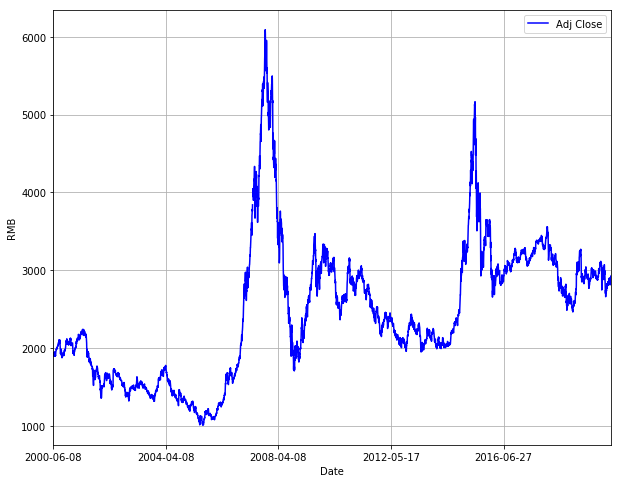

In [5]:
# visulaize the data
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
ax = df.plot(x='Date', y='Adj Close', style='b-', grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("RMB")

Text(0,0.5,'RMB')

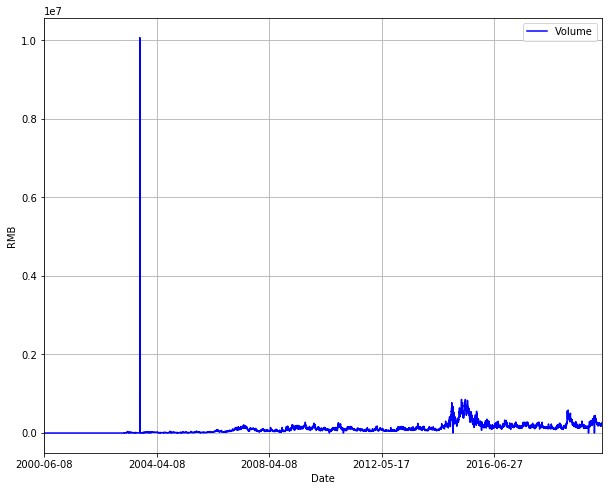

In [6]:
# visulaize the data
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
ax = df.plot(x='Date', y='Volume', style='b-', grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("RMB")

In [7]:
# Get the feature "Overnight return"

df['Overnight_Return'] = df['Open'] / df['Adj Close'].shift(1) - 1
df['Overnight_Return']

0            NaN
1       0.000490
2      -0.002293
3       0.002946
4       0.002974
5       0.000398
6       0.001757
7      -0.001168
8      -0.001113
9      -0.000300
10      0.002631
11      0.000735
12      0.003646
13      0.000584
14      0.000559
15      0.001061
16      0.000300
17     -0.005531
18     -0.002338
19      0.001305
20      0.000026
21      0.000806
22      0.003131
23      0.002176
24      0.002392
25      0.002624
26      0.001301
27      0.002869
28      0.000009
29      0.003182
          ...   
4929   -0.004580
4930    0.002296
4931   -0.001254
4932    0.001322
4933    0.001597
4934   -0.003075
4935    0.003523
4936   -0.009947
4937   -0.000579
4938    0.003896
4939    0.002152
4940   -0.000063
4941   -0.002974
4942   -0.003793
4943    0.003611
4944    0.001417
4945    0.007745
4946   -0.000728
4947    0.002421
4948   -0.001701
4949    0.000880
4950    0.003523
4951    0.000272
4952    0.000495
4953   -0.003738
4954    0.006876
4955    0.000304
4956    0.0030

In [8]:
# Get the feature "Change of the opening price"

df['delta_Open'] = df['Open'] / df['Open'].shift(1) - 1
df['delta_Open']


0            NaN
1      -0.005702
2      -0.015431
3       0.011476
4       0.013684
5      -0.005853
6       0.006538
7      -0.010796
8      -0.006037
9      -0.009563
10      0.012342
11     -0.001489
12      0.016390
13      0.001582
14     -0.002972
15      0.003016
16     -0.006156
17     -0.010528
18     -0.013683
19      0.010160
20     -0.000619
21     -0.002699
22      0.018254
23      0.006920
24      0.006645
25      0.006778
26      0.001629
27      0.005610
28     -0.005217
29      0.008995
          ...   
4929   -0.009912
4930    0.012951
4931   -0.005463
4932   -0.008006
4933    0.002755
4934   -0.006599
4935    0.011066
4936   -0.000265
4937    0.015835
4938    0.002168
4939    0.006542
4940   -0.002396
4941   -0.004029
4942    0.001423
4943   -0.002200
4944   -0.002841
4945    0.008760
4946   -0.000421
4947   -0.001983
4948   -0.009574
4949   -0.016348
4950    0.004139
4951    0.006868
4952   -0.003201
4953   -0.000924
4954    0.012830
4955    0.015443
4956    0.0048

In [9]:
# Get the features of trailing return 
df['Trail_1d'] = df['Close'].shift(1) / df['Close'].shift(2) - 1
df['Trail_2d'] = df['Close'].shift(1) / df['Close'].shift(3) - 1
df['Trail_3d'] = df['Close'].shift(1) / df['Close'].shift(4) - 1
df['Trail_5d'] = df['Close'].shift(1) / df['Close'].shift(6) - 1
df['Trail_13d'] = df['Close'].shift(1) / df['Close'].shift(14) - 1
df['Trail_47d'] = df['Close'].shift(1) / df['Close'].shift(48) - 1
df['Trail_131d'] = df['Close'].shift(1) / df['Close'].shift(132) - 1
df['Trail_613d'] = df['Close'].shift(1) / df['Close'].shift(614) - 1
df['Trail_1597d'] = df['Close'].shift(1) / df['Close'].shift(1598) - 1




In [10]:
#Get trailing volume features

df['Trail_1d_Vol1'] = df['Volume'].shift(1) / (
    df['Volume'].rolling(window=5).mean().shift(6)) - 1

df['Trail_1d_Vol2'] = df['Volume'].shift(1) / (
    df['Volume'].rolling(window=18).mean().shift(19)) - 1

df['Trail_1d_Vol3'] = df['Volume'].shift(1) / (
    df['Volume'].rolling(window=56).mean().shift(57)) - 1

df['Trail_5d_Rel_Vol1'] = df['Volume'].rolling(window=5).mean().shift(5) / (
    df['Volume'].rolling(window=18).mean().shift(23)) - 1

df['Trail_5d_Rel_Vol2'] = df['Volume'].rolling(window=18).mean().shift(5) / (
    df['Volume'].rolling(window=56).mean().shift(74)) - 1



In [11]:
# Get the feautures of Change from High to low
df['High_Low'] = df['High'].shift(1) / df['Low'].shift(1) - 1

In [12]:
# Get the features how much the SSE move from open to close relative to low to high

df['HL_OC'] = (df['Close'].shift(1) - df['Open'].shift(1)) / (
        df['High'].shift(1) - df['Low'].shift(1))

In [13]:
# Get the target value Intra day increase, which is the target we will predict

# label 1 : if SSE goes up in a given day
# label 0 : if SSE goes down in a given day

# df['Intraday_Increase'] = df['Close'] - df['Open']

# df.loc[df['Intraday_Increase']>0,'Intraday_Increase'] = 1
# df.loc[df['Intraday_Increase']<=0,'Intraday_Increase'] = 0

df['Intraday_Increase'] = df['Open'].shift(-1) - df['Open']

df.loc[df['Intraday_Increase']>0,'Intraday_Increase'] = 1
df.loc[df['Intraday_Increase']<=0,'Intraday_Increase'] = 0

In [14]:
# drop all the N/A values

df = df.dropna()

print ("Lengh of data points:", len(df))




('Lengh of data points:', 3135)


In [15]:
df
df.dtypes.index

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Adj Close', u'Volume',
       u'Overnight_Return', u'delta_Open', u'Trail_1d', u'Trail_2d',
       u'Trail_3d', u'Trail_5d', u'Trail_13d', u'Trail_47d', u'Trail_131d',
       u'Trail_613d', u'Trail_1597d', u'Trail_1d_Vol1', u'Trail_1d_Vol2',
       u'Trail_1d_Vol3', u'Trail_5d_Rel_Vol1', u'Trail_5d_Rel_Vol2',
       u'High_Low', u'HL_OC', u'Intraday_Increase'],
      dtype='object')

In [16]:
# Prepare the features data
X = df.copy()
X = X.drop(X.columns[[0,1,2,3,4,5,6,25]], axis = 1)


X

,Overnight_Return,delta_Open,Trail_1d,Trail_2d,Trail_3d,Trail_5d,Trail_13d,Trail_47d,Trail_131d,Trail_613d,Trail_1597d,Trail_1d_Vol1,Trail_1d_Vol2,Trail_1d_Vol3,Trail_5d_Rel_Vol1,Trail_5d_Rel_Vol2,High_Low,HL_OC
1598,-0.000451,-0.000246,-0.000086,0.017332,0.016038,0.022785,-0.047189,0.010305,0.282625,-0.079750,-0.165842,-0.166667,-0.479486,-0.419046,-0.396308,0.134806,0.009113,0.022617
1599,-0.001573,-0.023010,-0.021911,-0.021996,-0.004959,0.015058,-0.068725,-0.013039,0.248554,-0.085323,-0.173638,-0.021407,-0.430549,-0.368736,-0.459867,0.044725,0.028683,-0.766907
1600,0.000250,0.017720,0.015864,-0.006394,-0.006480,0.009541,-0.047464,0.028538,0.239224,-0.087086,-0.165694,-0.170772,-0.544589,-0.507703,-0.491123,0.003986,0.020618,0.849171
1601,-0.002473,0.010248,0.013006,0.029077,0.006528,0.023974,-0.027449,0.040966,0.260756,-0.079328,-0.166229,0.237024,-0.350000,-0.312736,-0.461466,-0.016246,0.015451,0.827535
1602,-0.001101,-0.006726,-0.008091,0.004810,0.020751,-0.001702,-0.005829,0.035413,0.242840,-0.079442,-0.170243,-0.034653,-0.466835,-0.445873,-0.471478,-0.045622,0.012284,-0.464067
1603,-0.020376,-0.022547,-0.003314,-0.011378,0.001480,-0.004924,-0.001622,0.043551,0.258823,-0.081627,-0.177248,0.010101,-0.440704,-0.442971,-0.464360,-0.083719,0.011151,-0.199353
1604,0.000233,0.023039,0.001960,-0.001361,-0.009441,0.019362,0.000174,0.043788,0.248308,-0.077932,-0.169073,-0.028239,-0.441231,-0.470674,-0.471543,-0.119298,0.028259,0.810651
1605,0.000643,0.008036,0.007623,0.009598,0.006251,0.011091,0.007681,0.024699,0.260788,-0.069601,-0.157607,0.143345,-0.349339,-0.406517,-0.435455,-0.142591,0.012696,0.582917
1606,0.000188,-0.001049,-0.000594,0.007024,0.008997,-0.002483,0.026906,0.016460,0.253488,-0.062383,-0.149288,0.095008,-0.320189,-0.408098,-0.447696,-0.172412,0.007868,-0.157761
1607,-0.000330,0.006066,0.006587,0.005989,0.013657,0.012278,0.048843,0.019270,0.249276,-0.058726,-0.151644,0.031353,-0.350649,-0.466382,-0.432315,-0.215790,0.013286,0.484823


In [17]:
# display the statistics for features
display(X.describe())

,Overnight_Return,delta_Open,Trail_1d,Trail_2d,Trail_3d,Trail_5d,Trail_13d,Trail_47d,Trail_131d,Trail_613d,Trail_1597d,Trail_1d_Vol1,Trail_1d_Vol2,Trail_1d_Vol3,Trail_5d_Rel_Vol1,Trail_5d_Rel_Vol2,High_Low,HL_OC
count,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000
mean,-0.001066,0.000227,0.000214,0.000406,0.000574,0.001002,0.002273,0.008647,0.038513,0.250424,0.453605,0.036568,0.071588,0.130696,0.063228,0.130077,0.018605,0.079419
std,0.007367,0.017462,0.016192,0.023102,0.028055,0.036859,0.061062,0.131308,0.272763,0.734176,0.554184,0.311065,0.435191,0.603550,0.385561,0.553261,0.013365,0.569158
min,-0.069685,-0.109487,-0.088406,-0.154737,-0.190848,-0.228465,-0.271791,-0.380408,-0.536941,-0.557992,-0.663377,-1.000000,-1.000000,-1.000000,-0.624310,-0.598240,0.002525,-1.000000
25%,-0.002822,-0.007099,-0.006549,-0.010639,-0.013370,-0.017867,-0.030751,-0.064071,-0.124406,-0.170566,0.110525,-0.173787,-0.240681,-0.268004,-0.222825,-0.245298,0.009821,-0.400576
50%,-0.000601,0.000494,0.000717,0.000655,0.001209,0.002693,0.004029,-0.005066,-0.001781,-0.007875,0.348266,-0.020305,-0.032875,-0.050847,-0.021470,-0.046849,0.014461,0.115772
75%,0.001491,0.008121,0.007770,0.012376,0.015809,0.021015,0.036458,0.066114,0.121139,0.434966,0.933688,0.185328,0.288247,0.318591,0.267828,0.299878,0.022797,0.575708
max,0.090623,0.135879,0.094551,0.179642,0.161234,0.211866,0.232688,0.573798,1.119772,4.432188,2.229275,3.018370,2.832385,4.096190,2.470118,2.617594,0.112293,1.000000


In [18]:
# Prepare the labels 

y = df.copy()
y = y.drop(y.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]], axis = 1)

y

,Intraday_Increase
1598,0.0
1599,1.0
1600,1.0
1601,0.0
1602,0.0
1603,1.0
1604,1.0
1605,0.0
1606,1.0
1607,1.0


# EDA

# Split the data into train, validation and test

In [83]:
# Split the data into train, validation and test sets:

# X_train = X[:300]
# X_val = X[300:600]
# X_test = X[600:]

# y_train = y[:300]
# y_val = y[300:600]
# y_test = y[600:]

X_train = X[-1800:-1500]
X_val = X[-1500:-1250]
X_test = X[-1250:-1100]

y_train = y[-1800:-1500]
y_val = y[-1500:-1250]
y_test = y[-1250:-1100]


print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("X_val.shape = " + str(X_val.shape))
print("y_val.shape = " + str(y_val.shape))

print("X_test.shape = " + str(X_test.shape))
print("y_test.shape = " + str(y_test.shape))

X_train.shape = (300, 18)
y_train.shape = (300, 1)
X_val.shape = (250, 18)
y_val.shape = (250, 1)
X_test.shape = (150, 18)
y_test.shape = (150, 1)


Text(0.5,1,'Without scaling')

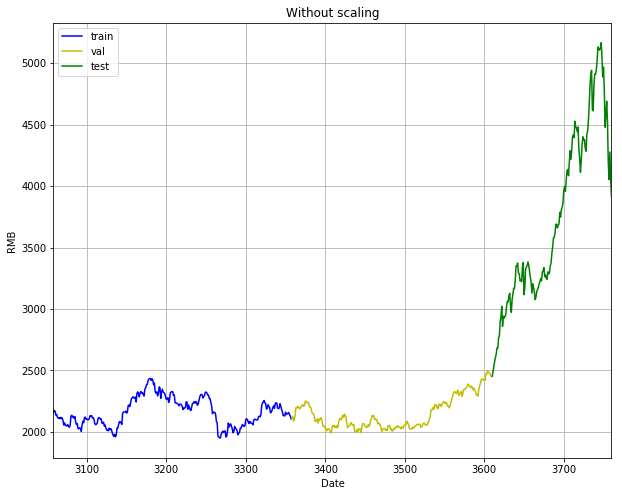

In [84]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

#ax = df[:300].plot(y='Adj Close', style='b-', grid=True)
#ax = df[300:600].plot(y='Adj Close', style='y-', grid=True, ax=ax)
#ax = df[600:].plot(y='Adj Close', style='g-', grid=True, ax=ax)

ax = df[-1800:-1500].plot(y='Adj Close', style='b-', grid=True)
ax = df[-1500:-1250].plot(y='Adj Close', style='y-', grid=True, ax=ax)
ax = df[-1250:-1100].plot(y='Adj Close', style='g-', grid=True, ax=ax)

ax.legend(['train', 'val', 'test'])
ax.set_xlabel("Date")
ax.set_ylabel("RMB")
ax.set_title("Without scaling")

In [85]:
# Anlysis the characteristics of the data

display(X_train.describe())
display(X_val.describe())
display(X_test.describe())

display(y_train.describe())
display(y_val.describe())
display(y_test.describe())





,Overnight_Return,delta_Open,Trail_1d,Trail_2d,Trail_3d,Trail_5d,Trail_13d,Trail_47d,Trail_131d,Trail_613d,Trail_1597d,Trail_1d_Vol1,Trail_1d_Vol2,Trail_1d_Vol3,Trail_5d_Rel_Vol1,Trail_5d_Rel_Vol2,High_Low,HL_OC
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.000857,0.000015,0.000027,0.000110,0.000252,0.000515,0.001284,-0.000051,-0.029640,-0.230485,0.216515,0.038014,0.109284,0.196792,0.105767,0.178251,0.014778,0.038236
std,0.003098,0.011469,0.011597,0.016752,0.020476,0.026770,0.043471,0.080894,0.093555,0.079691,0.331154,0.296322,0.420619,0.494734,0.355941,0.445953,0.008214,0.560748
min,-0.013058,-0.058267,-0.052993,-0.057958,-0.084079,-0.092522,-0.147763,-0.140731,-0.175486,-0.340823,-0.394759,-0.437742,-0.515407,-0.525659,-0.372573,-0.402644,0.005019,-0.988931
25%,-0.002317,-0.006848,-0.006290,-0.010166,-0.012414,-0.018653,-0.025260,-0.064127,-0.116385,-0.286609,-0.128777,-0.176230,-0.168278,-0.174964,-0.142094,-0.163959,0.009684,-0.438216
50%,-0.000666,-0.000388,0.000096,-0.001237,-0.001725,0.000662,0.001690,-0.015531,-0.043729,-0.254860,0.276702,-0.007691,-0.007616,0.033611,0.002706,-0.023699,0.012524,0.053937
75%,0.000923,0.005951,0.005674,0.008813,0.013963,0.018768,0.029398,0.058183,0.061364,-0.168127,0.457625,0.198324,0.276248,0.506361,0.243161,0.605803,0.017487,0.520798
max,0.008982,0.043345,0.043245,0.054714,0.058581,0.063274,0.106434,0.235636,0.152844,-0.033965,0.793728,1.543605,1.696052,1.605966,1.282456,1.082931,0.066546,0.991933


,Overnight_Return,delta_Open,Trail_1d,Trail_2d,Trail_3d,Trail_5d,Trail_13d,Trail_47d,Trail_131d,Trail_613d,Trail_1597d,Trail_1d_Vol1,Trail_1d_Vol2,Trail_1d_Vol3,Trail_5d_Rel_Vol1,Trail_5d_Rel_Vol2,High_Low,HL_OC
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,-0.000608,0.000629,0.000636,0.001301,0.001926,0.003160,0.007170,0.018369,0.017793,-0.133191,-0.515614,0.056732,0.121660,0.263170,0.097822,0.206237,0.012011,0.093642
std,0.002442,0.009050,0.008799,0.012989,0.016392,0.021401,0.033122,0.058483,0.083340,0.091816,0.102872,0.295931,0.408269,0.663141,0.368528,0.560785,0.005064,0.558991
min,-0.007828,-0.024395,-0.028594,-0.037600,-0.048889,-0.050673,-0.073765,-0.078543,-0.101266,-0.288272,-0.663377,-0.402680,-0.524250,-0.584896,-0.437128,-0.447679,0.004767,-0.938540
25%,-0.002012,-0.005117,-0.004329,-0.007499,-0.008332,-0.012836,-0.010887,-0.029066,-0.043574,-0.208154,-0.599392,-0.159689,-0.184699,-0.193228,-0.192284,-0.163367,0.008235,-0.348384
50%,-0.000581,0.000322,0.000403,0.000543,0.001863,0.004077,0.008230,0.006096,-0.012781,-0.149813,-0.522396,-0.018086,0.065714,-0.001106,0.042411,0.006257,0.011127,0.136869
75%,0.000820,0.006181,0.006357,0.009221,0.011881,0.016163,0.027660,0.072000,0.075997,-0.048775,-0.458581,0.226815,0.388712,0.689018,0.335342,0.406234,0.014757,0.625827
max,0.011165,0.031770,0.028744,0.046043,0.052338,0.061357,0.085675,0.147418,0.234439,0.049002,-0.196466,1.098416,1.794715,2.609403,1.144644,1.531568,0.033433,0.990806


,Overnight_Return,delta_Open,Trail_1d,Trail_2d,Trail_3d,Trail_5d,Trail_13d,Trail_47d,Trail_131d,Trail_613d,Trail_1597d,Trail_1d_Vol1,Trail_1d_Vol2,Trail_1d_Vol3,Trail_5d_Rel_Vol1,Trail_5d_Rel_Vol2,High_Low,HL_OC
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.000187,0.003615,0.003373,0.007449,0.011169,0.019105,0.058583,0.234531,0.626450,0.752774,0.592350,0.087304,0.280167,0.827994,0.253733,0.927927,0.028483,0.184301
std,0.008840,0.022900,0.022370,0.032393,0.038347,0.050286,0.079046,0.122012,0.199775,0.410211,0.651110,0.349737,0.562826,0.757163,0.501190,0.644272,0.017890,0.555545
min,-0.055314,-0.068830,-0.077046,-0.106026,-0.135842,-0.135699,-0.208508,-0.081732,0.194725,0.023459,-0.315895,-0.508501,-0.548576,-0.191160,-0.447905,0.183139,0.007689,-0.993831
25%,-0.002602,-0.008487,-0.005729,-0.009536,-0.013891,-0.010492,0.006909,0.121275,0.474036,0.471842,0.109563,-0.179011,-0.133432,0.296402,-0.142430,0.471230,0.017583,-0.326812
50%,0.000854,0.007042,0.005811,0.012681,0.018643,0.024625,0.067558,0.254847,0.606059,0.652275,0.391338,0.010547,0.100891,0.621717,0.126317,0.642173,0.023675,0.291091
75%,0.003778,0.018804,0.018572,0.028313,0.035029,0.056005,0.121475,0.340766,0.787079,1.081429,1.145950,0.263932,0.664375,1.100955,0.664963,1.406140,0.032603,0.682035
max,0.033644,0.051762,0.055315,0.066507,0.086982,0.127123,0.232688,0.433762,1.025299,1.631210,1.858424,1.375344,2.118352,4.096190,1.500256,2.617594,0.112293,0.993583


,Intraday_Increase
count,300.000000
mean,0.483333
std,0.500557
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


,Intraday_Increase
count,250.000000
mean,0.508000
std,0.500939
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


,Intraday_Increase
count,150.000000
mean,0.633333
std,0.483509
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# XGBoost Classifier Algorithms 

# save the data locally

In [86]:
data_dir = '../data/Stock_Price'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [87]:
# We use pandas to save our test, train and validation data to csv files. 

X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)

pd.concat([y_val, X_val], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)
pd.concat([y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)

# Upload to S3

In [88]:
prefix = 'SSE-xgboost-tuning-HL'

test_location = session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
val_location = session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
train_location = session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

# Train the XGBoost model

In [89]:
container = get_image_uri(session.boto_region_name, 'xgboost')

# Now that we know which container to use, we can construct the estimator object.
xgb = sagemaker.estimator.Estimator(container, # The name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.m4.xlarge', # The type of instance ot use for training
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                                                        # Where to save the output (the model artifacts)
                                    sagemaker_session=session) # The current SageMaker session

	get_image_uri(region, 'xgboost', '1.0-1').


In [90]:
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        objective='binary:logistic',
                        early_stopping_rounds=10,
                        num_round=200)

In [91]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner

xgb_hyperparameter_tuner = HyperparameterTuner(estimator = xgb, # The estimator object to use as the basis for the training jobs.
                                               objective_metric_name = 'validation:rmse', # The metric used to compare trained models.
                                               objective_type = 'Minimize', # Whether we wish to minimize or maximize the metric.
                                               max_jobs = 20, # The total number of models to train
                                               max_parallel_jobs = 3, # The number of models to train in parallel
                                               hyperparameter_ranges = {
                                                    'max_depth': IntegerParameter(2, 12),
                                                    'colsample_bylevel': ContinuousParameter(0, 1),
                                                    'colsample_bytree': ContinuousParameter(0, 1),
                                                    'min_child_weight': ContinuousParameter(0.001, 0.5),
                                                    'subsample': ContinuousParameter(0, 1),                                                    
                                                    'eta'      : ContinuousParameter(0.05, 0.5),
                                                    'min_child_weight': IntegerParameter(2, 20),
                                                    'subsample': ContinuousParameter(0.1, 1.0),
                                                    'gamma': ContinuousParameter(0, 10),
                                               })

In [92]:
# This is a wrapper around the location of our train and validation data, to make sure that SageMaker
# knows our data is in csv format.
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

xgb_hyperparameter_tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})

In [93]:
xgb_hyperparameter_tuner.wait()

..............................................................................................................................................................................................................................................................................................................!


In [94]:
xgb_hyperparameter_tuner.best_training_job()

u'xgboost-200609-0249-018-d650c1f9'

In [95]:
xgb_attached = sagemaker.estimator.Estimator.attach(xgb_hyperparameter_tuner.best_training_job())

2020-06-09 03:10:30 Starting - Preparing the instances for training
2020-06-09 03:10:30 Downloading - Downloading input data
2020-06-09 03:10:30 Training - Training image download completed. Training in progress.
2020-06-09 03:10:30 Uploading - Uploading generated training model
2020-06-09 03:10:30 Completed - Training job completedArguments: train
[2020-06-09:03:10:18:INFO] Running standalone xgboost training.
[2020-06-09:03:10:18:INFO] Setting up HPO optimized metric to be : rmse
[2020-06-09:03:10:18:INFO] File size need to be processed in the node: 0.2mb. Available memory size in the node: 8473.8mb
[2020-06-09:03:10:18:INFO] Determined delimiter of CSV input is ','
[03:10:18] S3DistributionType set as FullyReplicated
[03:10:18] 300x18 matrix with 5400 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2020-06-09:03:10:18:INFO] Determined delimiter of CSV input is ','
[03:10:18] S3DistributionType set as FullyReplicated
[03:10:18] 250x18 matrix with 4

# Test the model

In [96]:
xgb_transformer = xgb_attached.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

In [97]:
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')

In [98]:
xgb_transformer.wait()

.........................Arguments: serve
[2020-06-09 03:19:42 +0000] [1] [INFO] Starting gunicorn 19.7.1
[2020-06-09 03:19:42 +0000] [1] [INFO] Listening at: http://0.0.0.0:8080 (1)
[2020-06-09 03:19:42 +0000] [1] [INFO] Using worker: gevent
[2020-06-09 03:19:42 +0000] [37] [INFO] Booting worker with pid: 37
[2020-06-09 03:19:42 +0000] [38] [INFO] Booting worker with pid: 38
[2020-06-09:03:19:42:INFO] Model loaded successfully for worker : 37
[2020-06-09 03:19:42 +0000] [39] [INFO] Booting worker with pid: 39
[2020-06-09:03:19:42:INFO] Model loaded successfully for worker : 38
[2020-06-09 03:19:42 +0000] [40] [INFO] Booting worker with pid: 40
[2020-06-09:03:19:42:INFO] Model loaded successfully for worker : 39
[2020-06-09:03:19:42:INFO] Model loaded successfully for worker : 40
[2020-06-09:03:19:49:INFO] Sniff delimiter as ','
[2020-06-09:03:19:49:INFO] Determined delimiter of CSV input is ','
[2020-06-09:03:19:49:INFO] Sniff delimiter as ','
[2020-06-09:03:19:49:INFO] Determined del

In [99]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir

download: s3://sagemaker-us-west-2-522737736789/xgboost-200609-0249-018-d650c1f9-2020-06-09-03-15-39-190/test.csv.out to ../data/Stock_Price/test.csv.out


In [100]:
Y_pred = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)

In [101]:
# convert losgistic value into label 
lst = Y_pred[0].tolist()
y_pred_lst = []

for x in lst:
    if x > 0.5:
        y_pred_lst.append(1)
        
    else:
        y_pred_lst.append(0)
        
        
    

In [102]:
print(y_pred_lst[:10])
print(lst[:10])
Y_pred = pd.DataFrame(y_pred_lst)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
[0.30261567235, 0.297864764929, 0.44518271088600003, 0.413158655167, 0.502339243889, 0.481166362762, 0.322817951441, 0.502339243889, 0.42942315340000003, 0.502339243889]


In [103]:
from sklearn.metrics import precision_score
precision_score(y_test, Y_pred)


0.6363636363636364

# Trading Simulation

In [107]:
# Prepare the data for trading simulation


df_trade = pd.DataFrame({"Date":df['Date'][-1250:-1100].tolist(),'Open':df['Open'][-1250:-1100].tolist(), "Adj Close":df['Adj Close'][-1250:-1100].tolist()})


In [108]:
df_trade

,Adj Close,Date,Open
0,2452.616943,2014-11-20,2443.275879
1,2487.111084,2014-11-21,2452.635010
2,2533.887939,2014-11-24,2505.531982
3,2567.596924,2014-11-25,2531.998047
4,2604.886963,2014-11-26,2572.648926
5,2630.045898,2014-11-27,2615.366943
6,2682.918945,2014-11-28,2629.625977
7,2680.739990,2014-12-01,2691.725098
8,2763.316895,2014-12-02,2667.820068
9,2779.736084,2014-12-03,2768.677979


In [113]:
cash = 10000
profit = 0
profit_list = []

for i in range(len(df_trade)-1):
    if Y_pred[0][i] == 1:
        profit += (cash/df_trade['Open'][i]) *(df_trade['Open'][i+1] - df_trade['Open'][i])  # Buy at open price and sell at close price if the predicted label is 1
        profit_list.append(profit)
    else:
        pass
        



In [114]:
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=df_trade["Date"], 
                 y= pd.DataFrame({'Balance':profit_list})['Balance'],
                 mode='lines',
                 name='balance',
                 line=dict(color='blue')))


fig.update_layout(yaxis=dict(title='Earning (Margin Account) RMB'),
          xaxis=dict(title='date'))
fig.show()

            